# ETTm2 dataset analysis

This notebook analyzes the **ETTm2 dataset**, exploring its structure, performing preprocessing, and visualizing the time series data.  


## **1. Library imports**

In [13]:
import sys
import os
sys.path.append(os.path.abspath('../../'))

In [14]:
from data.utils import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **2. Dataset overview**

### **Loading the dataset**

In [15]:
# Dataset names : exchange_rate.csv , electricity.csv , ETTm2.csv , national_illness.csv , traffic.csv , weather.csv
df = pd.read_csv("../../data/all_six_dataset/ETT-small/ETTm2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    69680 non-null  object 
 1   HUFL    69680 non-null  float64
 2   HULL    69680 non-null  float64
 3   MUFL    69680 non-null  float64
 4   MULL    69680 non-null  float64
 5   LUFL    69680 non-null  float64
 6   LULL    69680 non-null  float64
 7   OT      69680 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB



### **Column descriptions**

This dataset captures electricity transformer temperature and operational metrics.

| **Column name** | **Description**    |
|------------------|--------------------|
| `date`           | Timestamp of the observation (in 15-minute intervals)        |
| `HUFL`              | High Usage Front Load percentage |
| `HULL`              | High Usage Low Load percentage|
| `MUFL`              | Medium Usage Front Load  |
| `MULL`              | Medium Usage Low Load |
| `LUFL`              | Low Usage Front Load    |
| `LULL`              | Low Usage Low Load   |
| `OT`             | Additional metadata |

## **3. Preprocessing the data**

### **Convert and set date as index**

In [16]:
df = convert_date(df)
df.set_index('date', inplace=True)
df.columns

Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], dtype='object')

**Frequency and summary:**
- Frequency: 15 minutes
- Time series : 7 {'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'}
- Total observations: 403 200
- Test observations: 80 640
- Rolled forecast data points: 58.1 million
- Horizon: {96, 192, 336, 720}



## **4. Visualizing the Dataset**

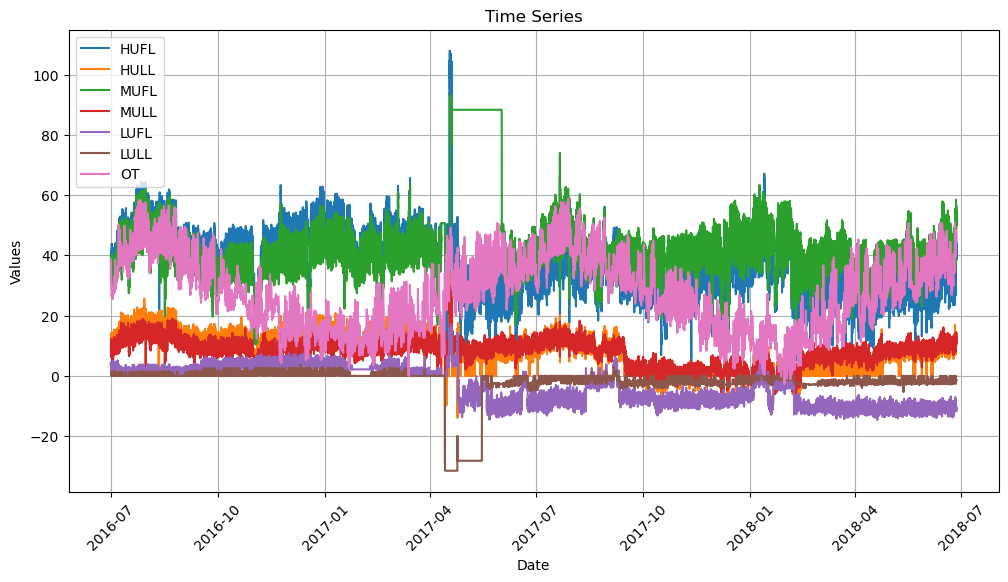

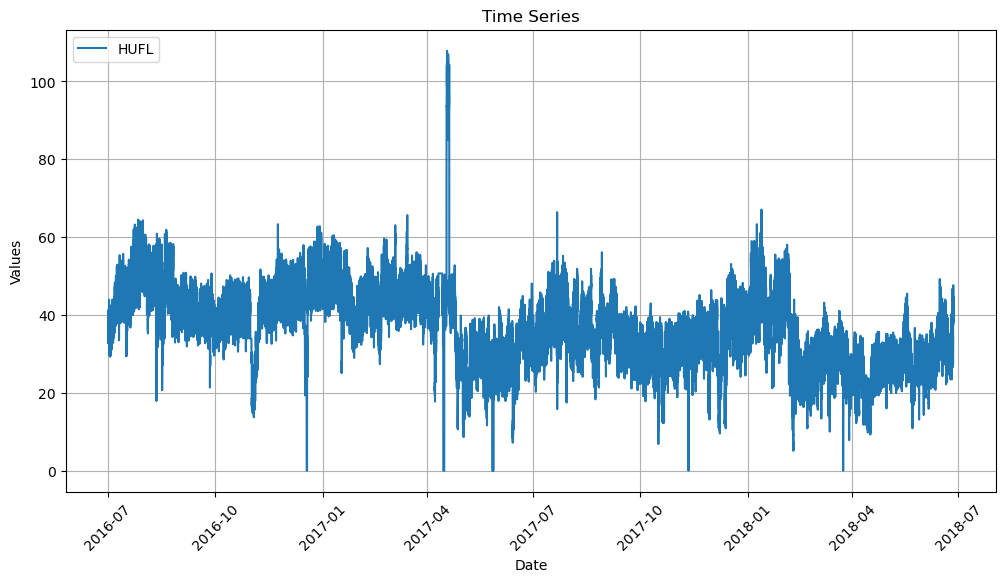

In [17]:
plot_time_series(df) # Plot all columns of the dataset
plot_time_series(df, column='HUFL')  # Plot a specific column

## **5. Splitting the Dataset**

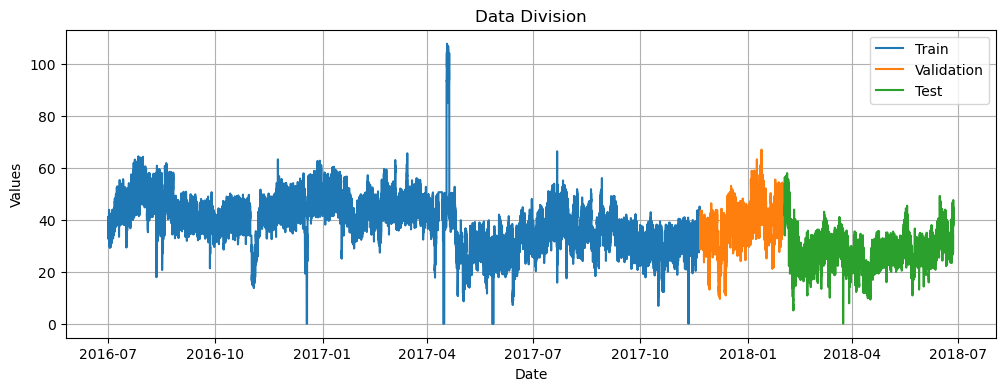

In [18]:
train, valid, test = split_data(df)
plot_data_split(train, valid, test, 'HUFL')